# Exploratory Data Analysis Resso Music

## Import Library and file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import bootstrap

In [2]:
song = pd.read_csv('data_top_resso_song.csv')

In [3]:
song.head()

,track_title,artist,album_title,duration,genre
0,"Kesariya (From ""Brahmastra"")","Pritam, Arijit Singh, Amitabh Bhattacharya","Kesariya (From ""Brahmastra"")",04:28,Resso Top 50
1,Pasoori,"Shae Gill, Ali Sethi",Pasoori,03:44,Resso Top 50
2,295,Sidhu Moose Wala,Moosetape,04:30,Resso Top 50
3,NO LOVE,Shubh,NO LOVE,02:50,Resso Top 50
4,The Last Ride,Sidhu Moose Wala,The Last Ride,04:22,Resso Top 50


## make changes of the type of data

In [4]:
song.dtypes

track_title    object
artist         object
album_title    object
duration       object
genre          object
dtype: object

In [5]:
base_hour = '00:'
duration = []
for i in range(len(song)):
    minutes = base_hour + song['duration'][i]
    duration.append(minutes)

In [6]:
song['hours'] = duration

In [7]:
song.head()

,track_title,artist,album_title,duration,genre,hours
0,"Kesariya (From ""Brahmastra"")","Pritam, Arijit Singh, Amitabh Bhattacharya","Kesariya (From ""Brahmastra"")",04:28,Resso Top 50,00:04:28
1,Pasoori,"Shae Gill, Ali Sethi",Pasoori,03:44,Resso Top 50,00:03:44
2,295,Sidhu Moose Wala,Moosetape,04:30,Resso Top 50,00:04:30
3,NO LOVE,Shubh,NO LOVE,02:50,Resso Top 50,00:02:50
4,The Last Ride,Sidhu Moose Wala,The Last Ride,04:22,Resso Top 50,00:04:22


In [8]:
song['hours'] = pd.to_datetime(song['hours'], errors='coerce')

In [9]:
song.dtypes

track_title            object
artist                 object
album_title            object
duration               object
genre                  object
hours          datetime64[ns]
dtype: object

In [10]:
song.drop(columns='duration',axis=1,inplace=True)

In [11]:
song['minutes'] = song['hours'].dt.minute

In [12]:
song['second'] = (song['minutes']*60) + (song['hours'].dt.second)

In [13]:
song.drop(columns='hours',axis=1,inplace=True)

In [14]:
song.head()

,track_title,artist,album_title,genre,minutes,second
0,"Kesariya (From ""Brahmastra"")","Pritam, Arijit Singh, Amitabh Bhattacharya","Kesariya (From ""Brahmastra"")",Resso Top 50,4.0,268.0
1,Pasoori,"Shae Gill, Ali Sethi",Pasoori,Resso Top 50,3.0,224.0
2,295,Sidhu Moose Wala,Moosetape,Resso Top 50,4.0,270.0
3,NO LOVE,Shubh,NO LOVE,Resso Top 50,2.0,170.0
4,The Last Ride,Sidhu Moose Wala,The Last Ride,Resso Top 50,4.0,262.0


In [15]:
song.dtypes

track_title     object
artist          object
album_title     object
genre           object
minutes        float64
second         float64
dtype: object

## explore the data

In [16]:
song.describe()

,minutes,second
count,827.000000,827.000000
mean,3.280532,227.656590
std,1.102999,64.571979
min,0.000000,45.000000
25%,3.000000,188.000000
50%,3.000000,222.000000
75%,4.000000,262.500000
max,10.000000,620.000000


- the cell above tell us about the fastest and the longest song in this data 
- the fastest song is 45 second 
- the longest song is 10 minute 
- mean of every songs in this dataset is 4 minute 19 second / 227 second
- we can see in chart below of duration song distribution 

In [17]:
data = (song['second'][:99],)
bootstrap_song = bootstrap(data, np.mean, confidence_level=0.95, random_state=1, method='percentile')
print(bootstrap_song.confidence_interval)

ConfidenceInterval(low=208.94747474747476, high=230.930303030303)


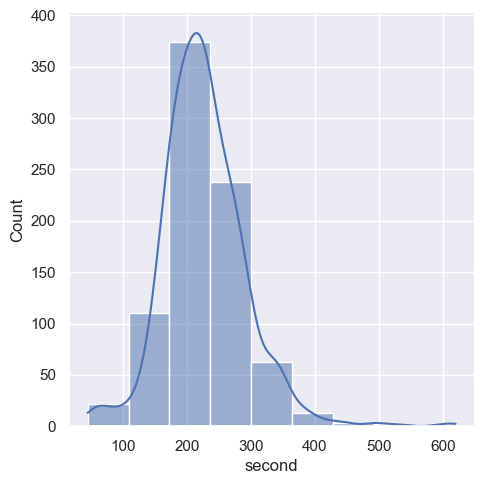

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.displot(data=song, x=song['second'], kde='true',bins=9)

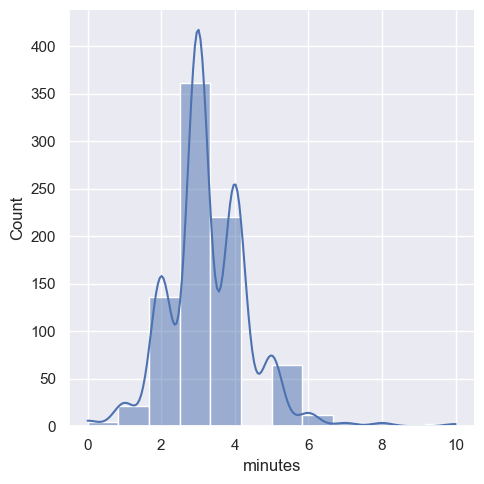

In [19]:
sns.displot(data=song, x=song['minutes'], kde='true',bins=12)

### Songs more than 180 second or 3 minute in every genre 

<AxesSubplot:>

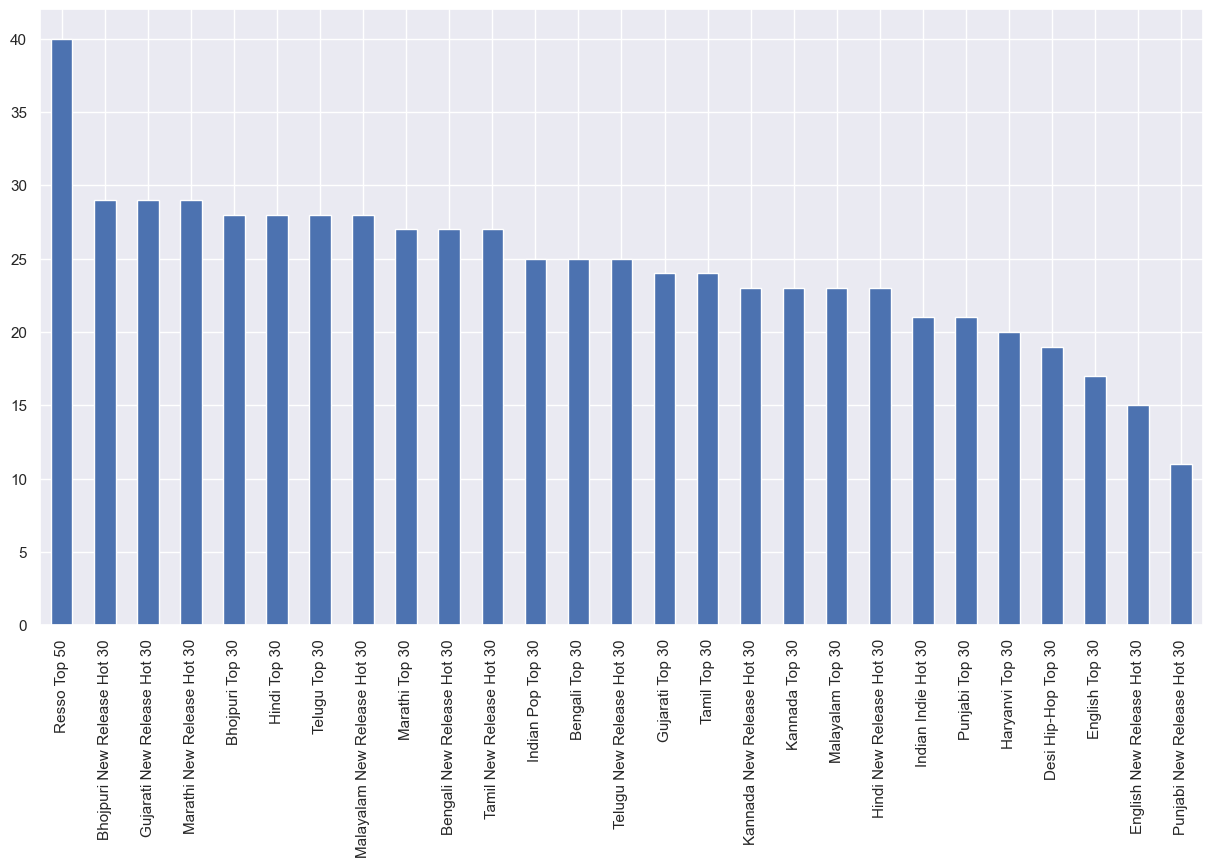

In [20]:
song.genre[song['second'] > 180].value_counts().plot(kind='bar', y='Total', x='Genre')

### Songs less than 180 second or 3 minute in every genre 

<AxesSubplot:>

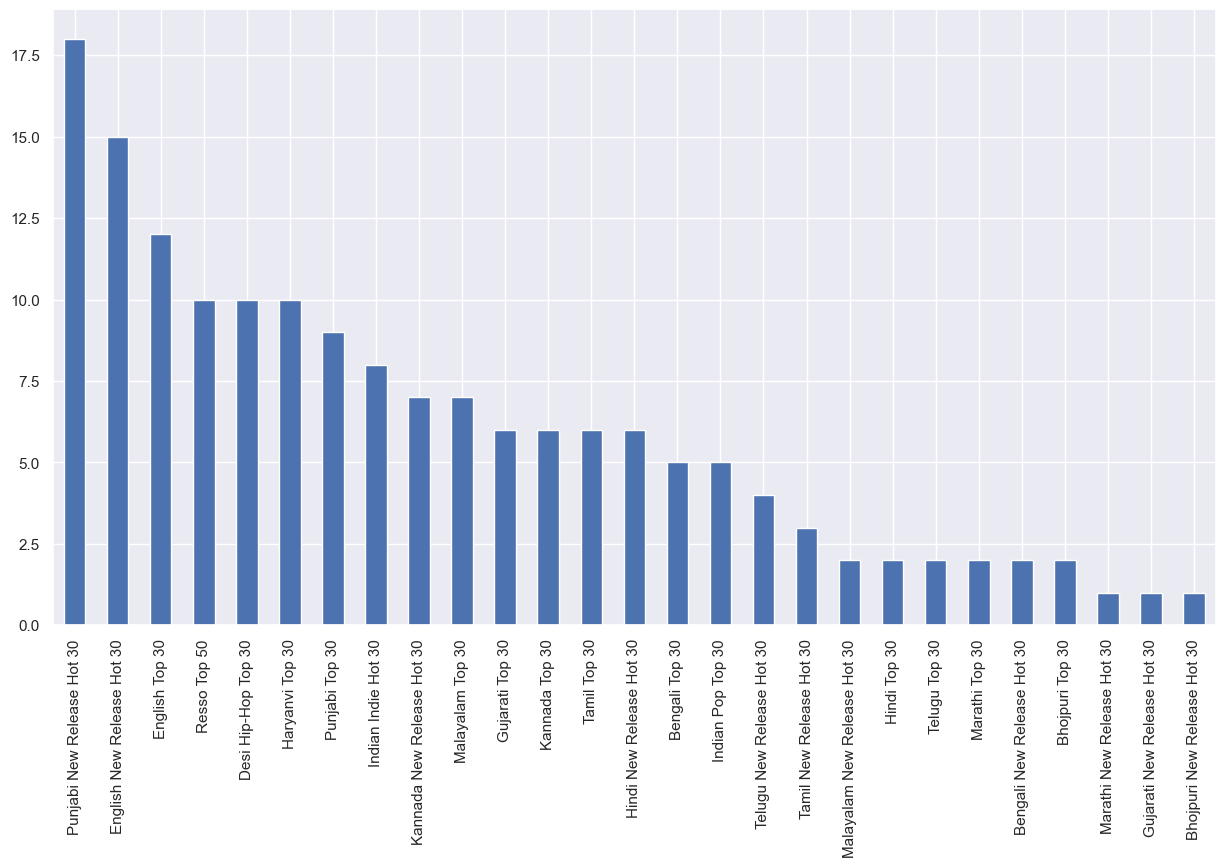

In [21]:
song.genre[song['second'] < 180].value_counts().plot(kind='bar')

In [22]:
song

,track_title,artist,album_title,genre,minutes,second
0,"Kesariya (From ""Brahmastra"")","Pritam, Arijit Singh, Amitabh Bhattacharya","Kesariya (From ""Brahmastra"")",Resso Top 50,4.0,268.0
1,Pasoori,"Shae Gill, Ali Sethi",Pasoori,Resso Top 50,3.0,224.0
2,295,Sidhu Moose Wala,Moosetape,Resso Top 50,4.0,270.0
3,NO LOVE,Shubh,NO LOVE,Resso Top 50,2.0,170.0
4,The Last Ride,Sidhu Moose Wala,The Last Ride,Resso Top 50,4.0,262.0
...,...,...,...,...,...,...
825,Dekhan De,Vijay Malik,Dekhan De,Haryanvi Top 30,3.0,208.0
826,2 Numbari,"Masoom Sharma, Manisha Sharma",2 Numbari,Haryanvi Top 30,3.0,229.0
827,Hathkadi,Amit Saini Rohtakia,Hathkadi,Haryanvi Top 30,3.0,190.0
828,Welcome,Gulzaar Chhaniwala,Welcome,Haryanvi Top 30,3.0,214.0


In [23]:
song['second']

0      268.0
1      224.0
2      270.0
3      170.0
4      262.0
       ...  
825    208.0
826    229.0
827    190.0
828    214.0
829    194.0
Name: second, Length: 830, dtype: float64

In [24]:
song['second'].min()

45.0

In [25]:
song['second'].max()

620.0

In [26]:
song['second'].mean()

227.65659008464328

In [27]:
song['second'].std()

64.57197939120991

In [28]:
song['second'].describe()

count    827.000000
mean     227.656590
std       64.571979
min       45.000000
25%      188.000000
50%      222.000000
75%      262.500000
max      620.000000
Name: second, dtype: float64